In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
visibility_file = '../data/visibilities/mock_visibilities_model_star_new.npz'

In [3]:
# load the mock visibilities from the .npz file
d = np.load(visibility_file)
uu = d["uu"]
vv = d["vv"]
weight = d["weight"]
data = d["data"]
data_re = np.real(data)
data_im = np.imag(data)

#calculate the amplitude and phase of the visibilities
amp = np.abs(data)
phase = np.angle(data)

# calculate the uv distance (baseline separations in meters, calculated as sqrt(u*u+v*v))
uvdist = np.hypot(uu, vv)

nvis = data.shape[0]

print(f'Loaded visibilities from {visibility_file}.')
print(f'The dataset has {nvis} visibilities.\n')

Loaded visibilities from ../data/visibilities/mock_visibilities_model_star_new.npz.
The dataset has 325080 visibilities.



In [4]:
re_and_im_df = pd.DataFrame({'uvdist': uvdist, 'V_re': data_re, 'V_im': data_im})
re_and_im_df.sort_values(by='uvdist', inplace=True, ignore_index=True)
re_and_im_df

,uvdist,V_re,V_im
0,28.902154,8.430027,-1.448523
1,28.909034,5.063991,0.413781
2,28.915925,6.158061,0.746967
3,28.922826,2.825887,-0.299580
4,28.929738,6.280441,0.984376
...,...,...,...
325075,2349.854223,0.660241,1.342157
325076,2350.191273,0.737226,1.377982
325077,2350.527455,0.144548,-0.118231
325078,2350.862770,1.224141,-0.229778


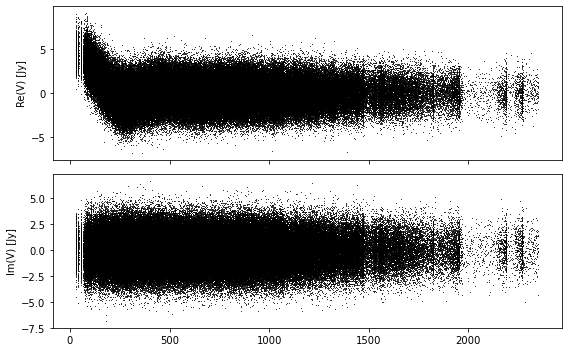

In [5]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(8, 5))
pkw = {"s":1, "rasterized":True, "linewidths":0.0, "c":"k"}

ax[0].scatter(re_and_im_df['uvdist'], re_and_im_df['V_re'], **pkw)
ax[0].set_ylabel("Re(V) [Jy]")

ax[1].scatter(re_and_im_df['uvdist'], re_and_im_df['V_im'], **pkw)
ax[1].set_ylabel("Im(V) [Jy]")

plt.tight_layout()
plt.show()

In [6]:
n_bins = 100

re_and_im_df['uvdist_bins'], bin_edges = pd.cut(re_and_im_df['uvdist'], bins=n_bins, retbins=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

bin_averaged_V_re = re_and_im_df.groupby('uvdist_bins')['V_re'].mean()
bin_averaged_V_im = re_and_im_df.groupby('uvdist_bins')['V_im'].mean()
bin_averaged_power = bin_averaged_V_re**2 + bin_averaged_V_im**2

power_spectrum_df = pd.DataFrame({'uvdist': bin_centers, 'V_re': bin_averaged_V_re.values, 'V_im':bin_averaged_V_im.values, 'power': bin_averaged_power.values})
power_spectrum_df


,uvdist,V_re,V_im,power
0,39.352481,4.745270,0.097538,22.527099
1,63.736580,4.134185,-0.190240,17.127678
2,86.959530,3.600482,-0.031477,12.964462
3,110.182481,2.926807,-0.065020,8.570427
4,133.405432,2.182477,0.085241,4.770471
...,...,...,...,...
95,2246.693940,0.157775,0.223798,0.074979
96,2269.916890,-0.109408,0.054724,0.014965
97,2293.139841,0.202309,-0.275133,0.116627
98,2316.362792,0.167360,0.116769,0.041644


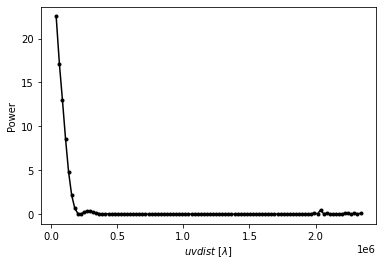

In [19]:
fig, ax = plt.subplots()
ax.plot(power_spectrum_df['uvdist']*1000, power_spectrum_df['power'], marker='.', color='k')
ax.set_xlabel(r"$uvdist$ [$\lambda$]")
ax.set_ylabel("Power")
#plt.ylim(0, 0.75)
plt.show()

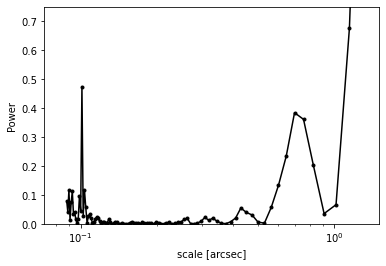

In [48]:
fig, ax = plt.subplots()
ax.plot((1/(power_spectrum_df['uvdist']*1000))*(180*60*60/math.pi), power_spectrum_df['power'], marker='.', color='k')
ax.set_xlabel(r"scale [arcsec]")
ax.set_ylabel("Power")

plt.xscale('log')
plt.xlim(right=1.5)
plt.ylim(0, 0.75)

plt.show()